# Tarea 1 MCMC Metropolis Multiples Caminadores

In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import distributions
from getdist import plots, gaussian_mixtures
from getdist import plots, MCSamples

In [2]:
#data=np.load('test_line.npy')
data=np.load('fit_exercise.npy')

### Calculo de Prior, Likelihood y Posterior

In [3]:
#condicioenes para el prior
a_min, a_max=-10, 10
b_min, b_max=-10, 10

def prior(a, b, a_min=a_min, a_max=a_max, b_min=b_min, b_max=b_max):
    logp=0
    if a>a_min and a<a_max and b>b_min and b<b_max:
        logp=np.log(1/(a_max-a_min)+1/(b_max-b_min))
    return logp

In [4]:
def Likelihood(a, b, t=data[2], y=data[1], x=data[0]):
    log_like=0
    mu = a + b*x
    log_like += -0.5*np.sum(np.log(2*np.pi*t**2)+(y - mu)**2/(t**2))
    return log_like

In [5]:
def calc_posterior(a, b, t=data[2], y=data[1], x=data[0]): 
    log_posterior=0
    log_posterior = Likelihood(a,b)
    return log_posterior

### MCMC Metropolis

In [6]:
def metropolis(n_iterations, initial_values, prop_var):
             
    evolution = np.zeros((n_iterations+1, len(initial_values)))  #en esta matriz se guardará los parametros a, b y sigma
    evolution_R= np.zeros((n_iterations+1, len(initial_values))) #se gurdarán todos los valores rechazados y aceptados
    evolution[0] = initial_values     
    evolution_R[0] = initial_values
    current_log_prob = calc_posterior(*evolution[0])  #llamado a la función con entradas como vector de los parametros
    accepted = [0]*len(initial_values)                #contador de cuantas veces se rechazó o se guardó el parametro

    for i in range(n_iterations):      
        current_params = evolution[i]   #paramatros iniciales para los valores que se calcularan 
        for j in range(len(initial_values)):        
            p = evolution[i].copy()     #Realiza una copia de la fila i-esima para calcular nuevamente el postirior y comparar
            theta = np.random.normal (current_params[j], prop_var)    #se crean los numeros aleatorios de a, b y sigma    
            p[j] = theta                             #p contiene los parametros con los que se calculara el nuevo posterior
            proposed_log_prob = calc_posterior(*p)   #se calcula el postitior con los valores de p propuestos
            alpha = proposed_log_prob - current_log_prob #se calcula el ratio de los postiriors (nuevo - viejo)
            
            if np.log(np.random.rand()) < alpha:  
                evolution[i+1,j] = theta
                current_log_prob = proposed_log_prob    #se acepta el nuevo prior y se guarda
                accepted[j] += 1                        #contador de veces aceptado
            else:                      
                evolution[i+1,j] = evolution[i,j]
            
            evolution_R[i+1,j] = p[j]                   #se guardan todos los valores para graficar
                
    return evolution, evolution_R, accepted

In [7]:
n_iterations=10000
prop_des=.05
walkers=5
alpha=-5
beta=5

initial_values=[np.random.uniform(alpha, beta),np.random.uniform(alpha,beta)]
E_W=np.zeros((walkers,n_iterations+1,len(initial_values)))      #evolution walker acepted
E_W_R=np.zeros((walkers,n_iterations+1,len(initial_values)))    #evolution walker reject


for l in range (0,walkers):
    initial_values=[np.random.uniform(alpha, beta),np.random.uniform(alpha,beta)]
    evolution = metropolis(n_iterations,initial_values,prop_des)        
    E_W[l]=evolution[0]      #guarda los valores aceptados de la evolución de cada uno de los llamados a la función metropolis
    E_W_R[l]=evolution[1]    #guarda los todos los valores aceptados y rechazados para graficar al fondo

    
iteration= np.arange(len(E_W[l,:,0]))

### Gelman-Rubin Diagnostic

In [8]:
def Gelman_Rubin(chain):
    mean_for_chain=(np.zeros(walkers))
    si_sqrt=np.zeros(walkers)
    S=np.zeros(walkers)
    parameter_mean=np.zeros(walkers)
    B_n=0
    for w in range (walkers):
        si_sqrt[w]=1/(n_iterations-1)*(np.sum((chain[w,:])-np.mean(chain[w,:])**2))
        parameter_mean[w]=np.mean(chain[w,:])
        
    S_sqrt=1/walkers*(np.sum(si_sqrt))
    overal_mean=np.mean(parameter_mean)
    B_n=1/(walkers-1)*np.sum((parameter_mean-overal_mean)**2)
    sigma=(n_iterations-1)/n_iterations*S_sqrt+B_n
    R=np.sqrt(sigma/S_sqrt)

    return R
   

In [9]:
R_a=Gelman_Rubin(E_W[:,:,0])
R_b=Gelman_Rubin(E_W[:,:,1])
print('R for a and b')
print(R_a, R_b)


R for a and b
0.9995366779453329 0.9995191352489334


### Aceptación de parametros y puntos

In [19]:
acepted_parameter=evolution[2]
acepted_point=np.max(acepted_parameter)
Acepted_percent=acepted_point/n_iterations*100
print(Acepted_percent, '%')

60.660000000000004 %


### Graficos

solution for walker number 0
[ 5.40891686 -1.09530056]
mean a= 5.178520013777014 
mean b= -1.0730845889000724
std a= 1.3195353704964443 
std b= 0.17103690089634419
    
solution for walker number 1
[ 5.4947768  -1.11768209]
mean a= 5.1326512240733235 
mean b= -1.0125478706959865
std a= 1.378163671545174 
std b= 0.49488559423266915
    
solution for walker number 2
[ 5.37056746 -1.09635095]
mean a= 5.303617122596765 
mean b= -1.0774456926059632
std a= 0.7504054855036343 
std b= 0.15975884394118242
    
solution for walker number 3
[ 5.47886827 -1.09357037]
mean a= 5.4058536991407795 
mean b= -1.1267821236793039
std a= 0.28211023301284116 
std b= 0.22129024508792383
    
solution for walker number 4
[ 5.41234897 -1.10597157]
mean a= 5.446387367157042 
mean b= -1.1109375239223598
std a= 0.0947073013601129 
std b= 0.087114216157591
    


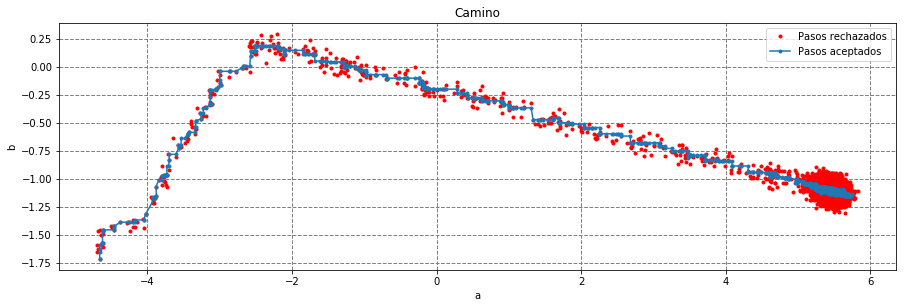

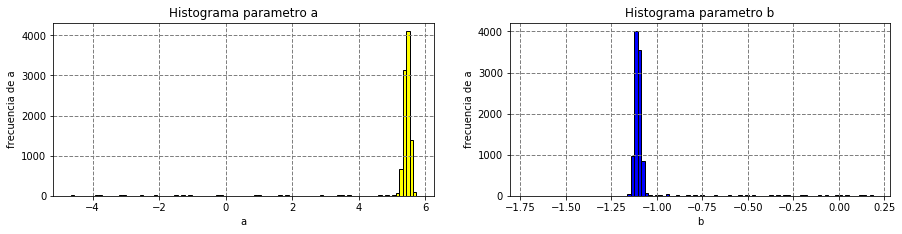

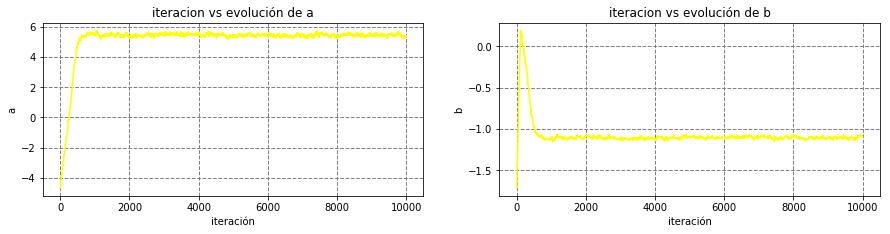

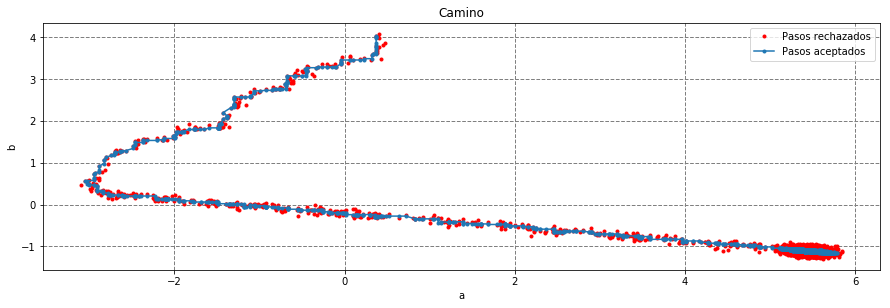

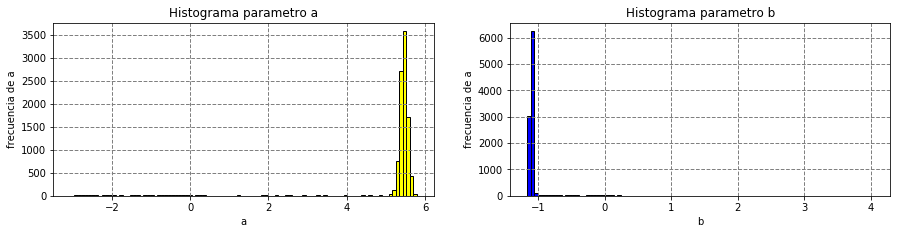

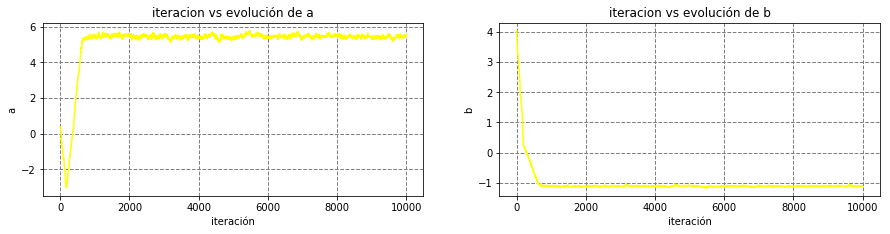

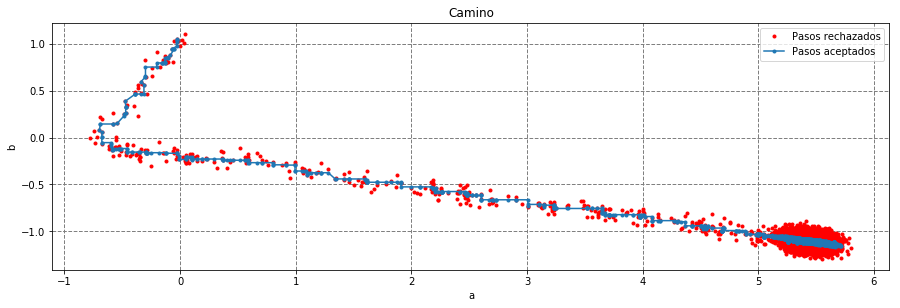

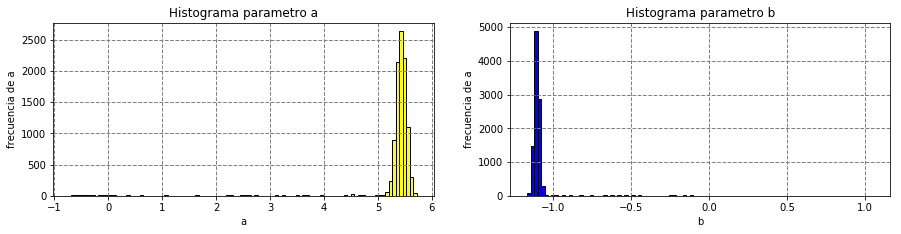

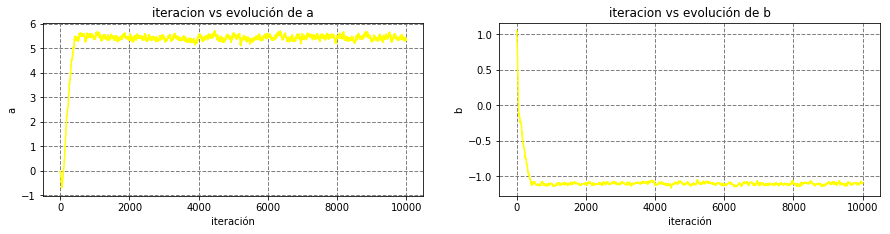

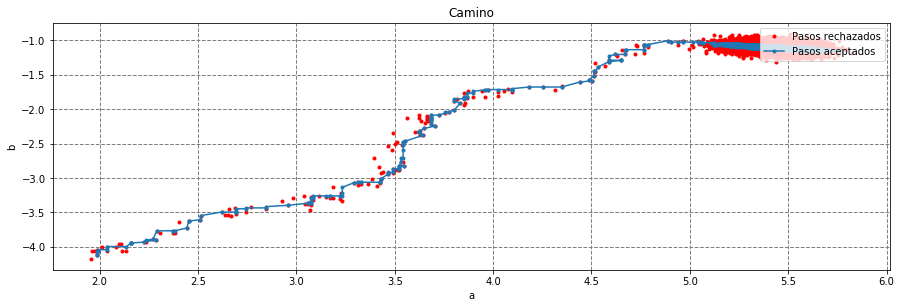

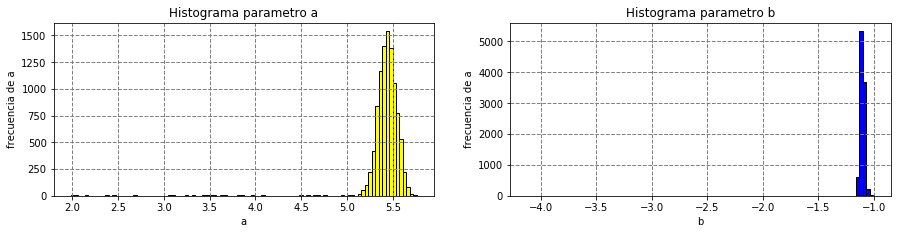

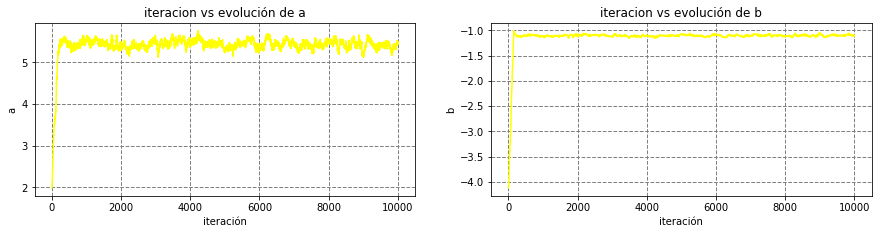

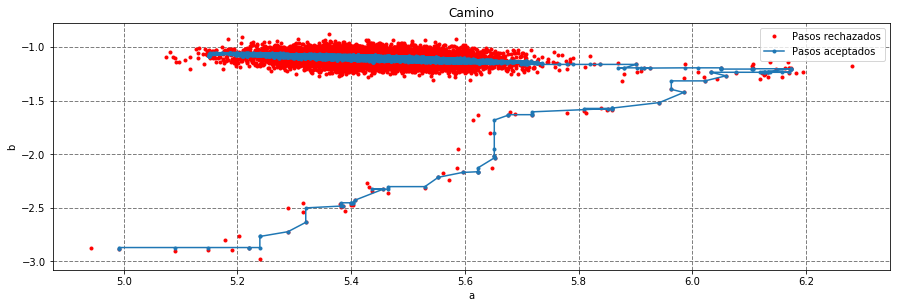

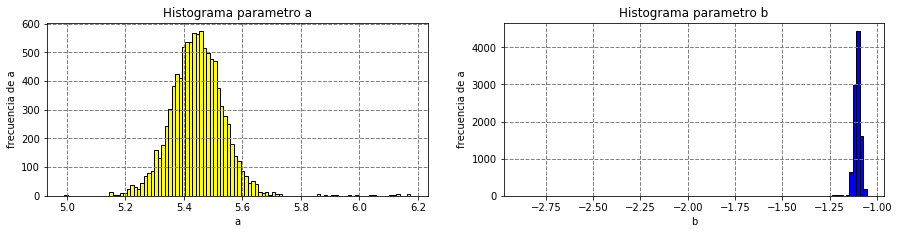

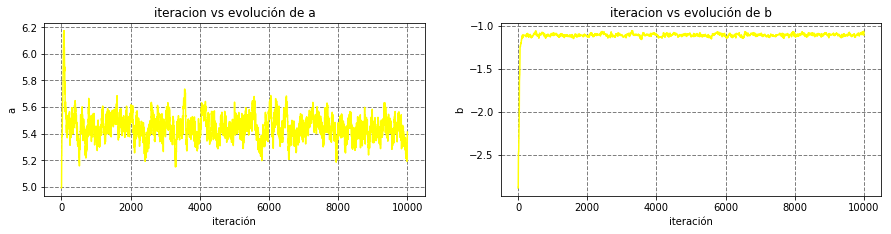

In [11]:
#caminos
for ll in range (walkers):
    plt.figure(figsize=(15,10))
    plt.subplot(2,1,2)
    plt.plot(E_W_R[ll,:,0],E_W_R[ll,:,1],'.', color='red')
    plt.plot(E_W[ll,:,0],E_W[ll,:,1],'.-')
    plt.title("Camino")
    plt.xlabel("a")              
    plt.ylabel("b") 
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.legend(('Pasos rechazados', 'Pasos aceptados'), loc='upper right')
    print('solution for walker number', ll )
    print(E_W[ll,-1,:])
    print('mean a=', np.mean(E_W[ll,:,0]),'\n' 'mean b=', np.mean(E_W[ll,:,1]))
    print('std a=', np.std(E_W[ll,:,0]),'\n' 'std b=', np.std(E_W[ll,:,1]))
    print('    ')

#histogramas    
    plt.figure(figsize=(15,7))
    plt.subplot(2,2,1)
    plt.hist(E_W[ll,:,0],100,color='yellow',edgecolor='black',label='parametro b');
    plt.title("Histograma parametro a")
    plt.xlabel('a')              
    plt.ylabel('frecuencia de a')               
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

    plt.subplot(2,2,2)
    plt.hist(E_W[ll,:,1],100,color='blue',edgecolor='black',label='parametro a');
    plt.title("Histograma parametro b")
    plt.xlabel("b")              
    plt.ylabel("frecuencia de a") 
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    
#cambios de parametros en las iteraciones
    plt.figure(figsize=(15,7))
    plt.subplot(2,2,1)
    plt.plot(iteration,E_W[ll,:,0],color='yellow',label='parametro b');
    plt.title("iteracion vs evolución de a")
    plt.xlabel('iteración')              
    plt.ylabel('a')               
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

    plt.subplot(2,2,2)
    plt.plot(iteration,E_W[ll,:,1],color='yellow',label='parametro a');
    plt.title("iteracion vs evolución de b")
    plt.xlabel('iteración')              
    plt.ylabel('b')   
    #plt.ylim(np.min(E_W[ll,:,1]),np.max(E_W[ll,:,1]))
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

### Grafica del Triangulo

Removed no burn in


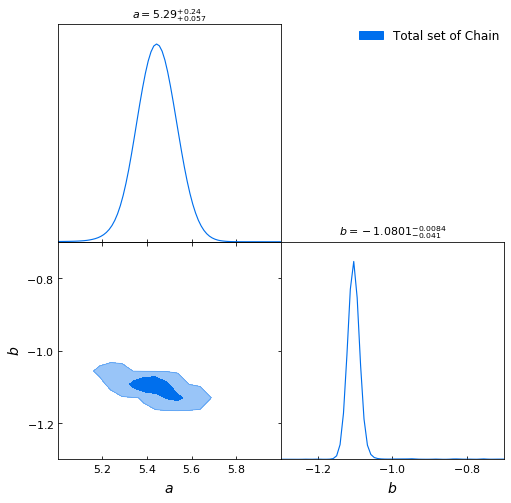

In [16]:
c_a=0
c_b=0
for z in range(0,walkers):        #en este for juntamos todas las cadenas para hacer la grafica del triangulo con una sola 
                                  #cadena que corresponde a unir todas las cadenas
    c_a=np.append(c_a,E_W[z,:,0])
    c_b=np.append(c_b,E_W[z,:,1])
    
SampsP=np.array([c_a.T,c_b.T]).T
names = ['a0', 'b0']
labels =  ['a', 'b']
SamplesP = MCSamples(samples=SampsP,names = names, labels = labels, label='Second set')

g = plots.get_subplot_plotter(4)
g.settings.figure_legend_frame = False
g.triangle_plot([SamplesP], filled=True, 
                legend_labels = ['Total set of Chain'], legend_loc='upper right',
                title_limit=1, param_limits={'a0': (5, 6), 'b0': (-1.3, -.7)}, markers={'a':0})

# cambiando title_limit a 2 da un intervalo de confianza de 95%, siendo el 1 por defaut el de 68%
#el intervalo de confianza se muestra en la grafica del triangulo






In [14]:
from scipy import stats 
import numpy as np 
mean, sigma = np.mean(c_a), np.std(c_b) 

conf_int = stats.norm.interval(0.68, loc=mean, scale=sigma) 

In [15]:
conf_int

(5.024941702826633, 5.561658357041222)